In [2]:
import os
import numpy as np
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
TRAIN_DIR = 'input/train/'
TEST_DIR = 'input/test1/'

In [4]:
# we only take the first 2000 from the training set
# and only the first 1000 from the test set
# REMOVE [0:2000] and [0:1000] when running locally
train_image_file_names = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)][0:2000] 
test_image_file_names = [TEST_DIR+i for i in os.listdir(TEST_DIR)][0:1000]

In [5]:
def decode_image(image_file_names, resize_func=None):
    
    images = []
    
    graph = tf.Graph()
    with graph.as_default():
        file_name = tf.placeholder(dtype=tf.string)
        file = tf.read_file(file_name)
        image = tf.image.decode_jpeg(file)
        if resize_func != None:
            image = resize_func(image)
    
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()   
        for i in range(len(image_file_names)):
            images.append(session.run(image, feed_dict={file_name: image_file_names[i]}))
            if (i+1) % 1000 == 0:
                print('Images processed: ',i+1)
        
        session.close()
    
    return images

In [6]:
train_images = decode_image(train_image_file_names)
test_images = decode_image(test_image_file_names)
all_images = train_images + test_images

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Images processed:  1000
Images processed:  2000
Images processed:  1000


In [7]:
width = []
height = []
aspect_ratio = []
for image in all_images:
    h, w, d = np.shape(image)
    aspect_ratio.append(float(w) / float(h))
    width.append(w)
    height.append(h)

Mean aspect ratio:  1.171879577851859


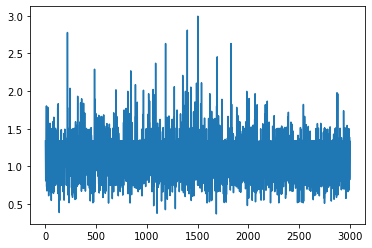

In [8]:
print('Mean aspect ratio: ',np.mean(aspect_ratio))
plt.plot(aspect_ratio)
plt.show()

Mean width: 407.852
Mean height: 358.954


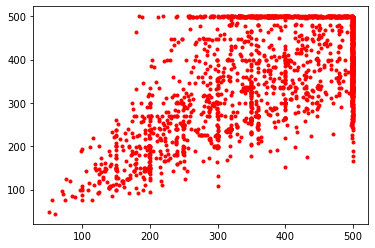

In [9]:
print('Mean width:',np.mean(width))
print('Mean height:',np.mean(height))
plt.plot(width, height, '.r')
plt.show()

In [10]:
print("Images widther than 500 pixel: ", np.sum(np.array(width) > 500))
print("Images higher than 500 pixel: ", np.sum(np.array(height) > 500))

Images widther than 500 pixel:  0
Images higher than 500 pixel:  0


In [11]:
# Free up some memory
del train_images
del test_images
del all_images


In [12]:
WIDTH=500
HEIGHT=500
resize_func = lambda image: tf.image.resize_image_with_crop_or_pad(image, HEIGHT, WIDTH)

In [13]:
processed_train_images = decode_image(train_image_file_names, resize_func=resize_func)
processed_test_images = decode_image(test_image_file_names, resize_func=resize_func)


Images processed:  1000
Images processed:  2000
Images processed:  1000


In [14]:
print(np.shape(processed_train_images))
print(np.shape(processed_test_images))

(2000, 500, 500, 3)
(1000, 500, 500, 3)


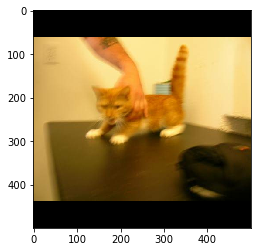

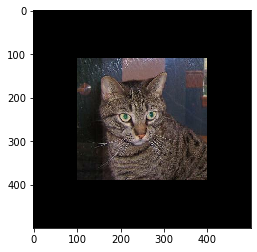

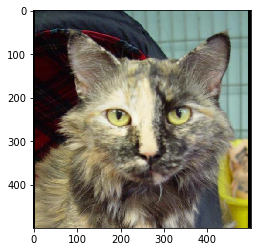

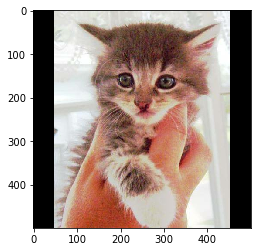

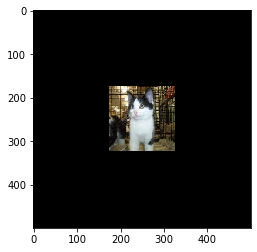

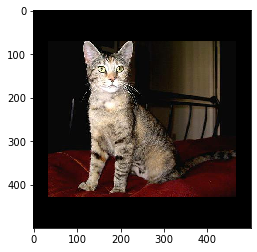

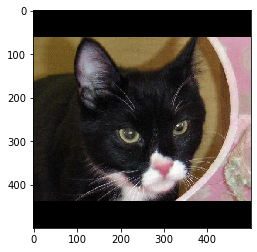

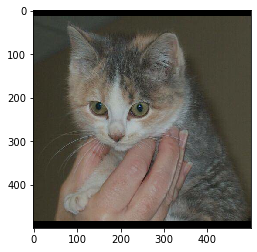

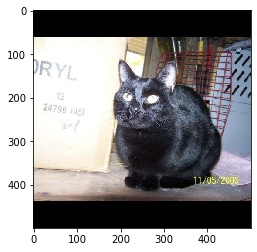

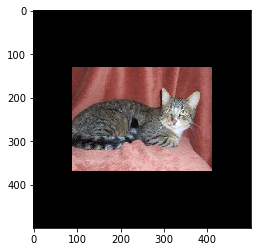

In [15]:
for i in range(10):
    plt.imshow(processed_train_images[i])
    plt.show()


In [16]:
def create_batch(data, label, batch_size):
    i = 0
    while i*batch_size <= len(data):
        with open(label+ '_' + str(i) +'.pickle', 'wb') as handle:
            content = data[(i * batch_size):((i+1) * batch_size)]
            pickle.dump(content, handle)
            print('Saved',label,'part #' + str(i), 'with', len(content),'entries.')
        i += 1


In [17]:
labels = [[1., 0.] if 'dog' in name else [0., 1.] for name in train_image_file_names]

NameError: name 's' is not defined